In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
#importamos el dataset
df = pd.read_csv('/Users/lucianayelicich/Desktop/Adalab/bda-modulo-3-evaluacion-final-lucianayelicich/Data/archivo_aviacion_final.csv', index_col=0)
df.head(1)

,Loyalty Number,Date,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary
0,100018,01-2017,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,92552.0


1 . ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [4]:
bins = np.arange(0,13,1)

In [5]:
bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [9]:
df_vuelos_por_mes = df.groupby('Date')['Flights Booked'].sum().reset_index()

# Ordenar los datos por fecha
df_vuelos_por_mes = df_vuelos_por_mes.sort_values(by='Date')

In [10]:
df_vuelos_por_mes.head()

,Date,Flights Booked
0,01-2017,47766
1,01-2018,49170
2,02-2017,47691
3,02-2018,48643
4,03-2017,64271


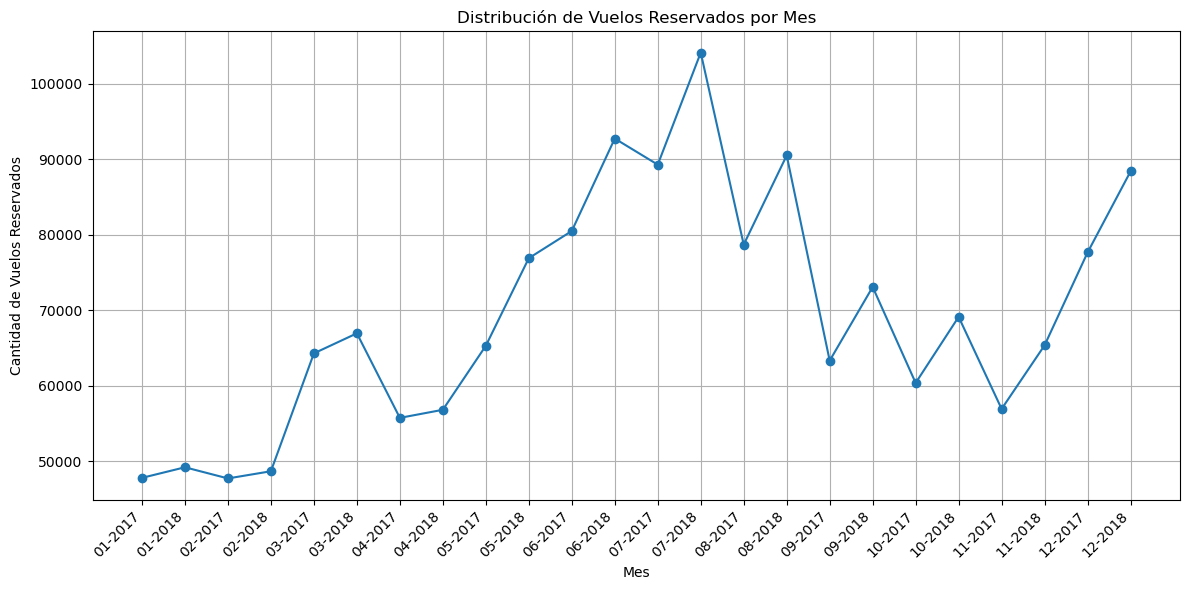

In [7]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(df_vuelos_por_mes['Date'], df_vuelos_por_mes['Flights Booked'], marker='o', linestyle='-')

# Añadir etiquetas y título
plt.title('Distribución de Vuelos Reservados por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Vuelos Reservados')
plt.grid(True)

# Mejorar la legibilidad de las etiquetas del eje X
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta el diseño para que no se corten las etiquetas
plt.show()

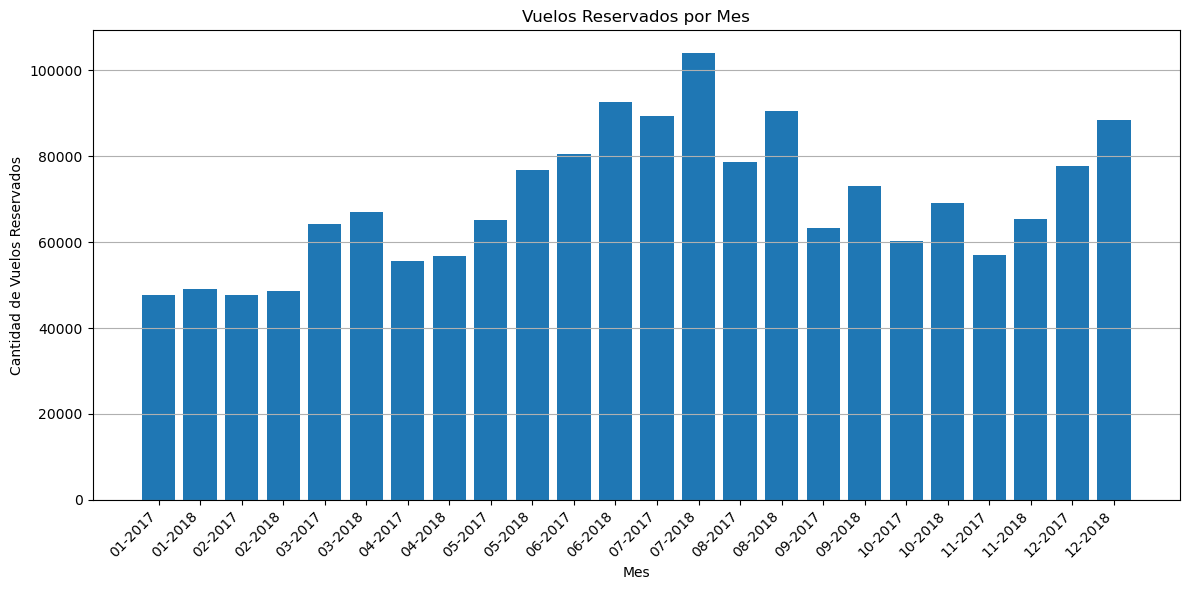

In [8]:
# Gráfico de barras (alternativa)
plt.figure(figsize=(12, 6))
plt.bar(df_vuelos_por_mes['Date'], df_vuelos_por_mes['Flights Booked'])

# Añadir etiquetas y título
plt.title('Vuelos Reservados por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Vuelos Reservados')
plt.grid(axis='y') # Añade una cuadrícula solo en el eje y
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?


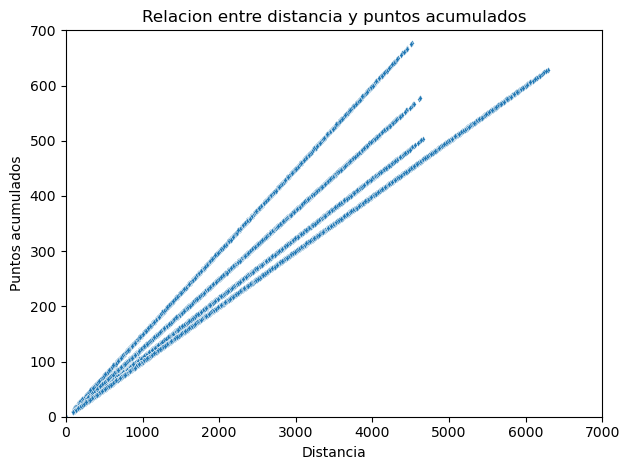

In [25]:
sns.scatterplot(data=df, x = 'Distance', y = 'Points Accumulated', marker='d', s=10);
plt.xlim(0,7000)
plt.ylim(0, 700)
plt.title('Relacion entre distancia y puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos acumulados')
plt.tight_layout()
plt.show();


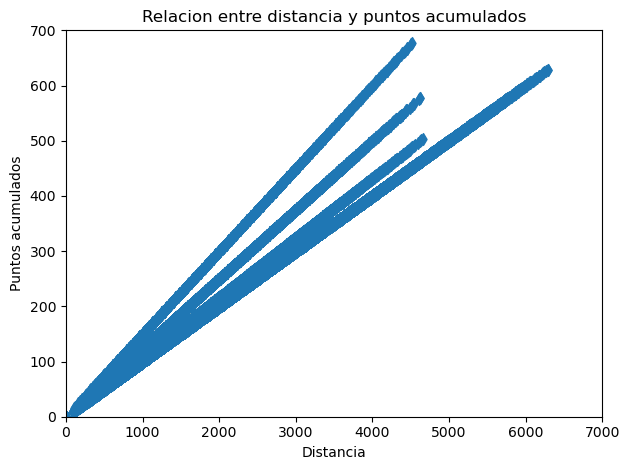

In [22]:
plt.scatter(data=df, x = 'Distance', y = 'Points Accumulated', marker='d' );
plt.xlim(0,7000)
plt.ylim(0, 700)
plt.title('Relacion entre distancia y puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos acumulados')
plt.tight_layout()
plt.show();

 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [29]:
orden_provincia = df['Province'].value_counts().index

In [30]:
orden_provincia

Index(['Ontario', 'British Columbia', 'Quebec', 'Alberta', 'Manitoba',
       'New Brunswick', 'Nova Scotia', 'Saskatchewan', 'Newfoundland', 'Yukon',
       'Prince Edward Island'],
      dtype='object', name='Province')

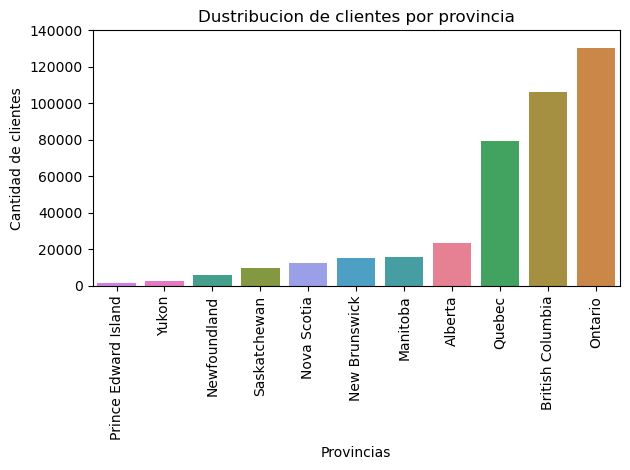

In [39]:
sns.countplot(data = df, x= "Province", hue='Province', order=orden_provincia[::-1])
plt.xticks(rotation = 90)
plt.ylim(0, 140000)
plt.title('Dustribucion de clientes por provincia')
plt.xlabel('Provincias')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show();

 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [41]:
df.groupby('Salary')['Education'].value_counts().reset_index()

,Salary,Education,count
0,-58486.0,Bachelor,24
1,-57297.0,Bachelor,24
2,-49830.0,High School or Below,24
3,-49001.0,Bachelor,24
4,-47310.0,Bachelor,24
...,...,...,...
5923,362833.0,Doctor,24
5924,363189.0,Doctor,24
5925,381124.0,Doctor,24
5926,397919.0,Doctor,24


In [44]:
pd.crosstab(df['Salary'], df['Education'], normalize=True)

Education,Bachelor,College,Doctor,High School or Below,Master
Salary,,,,,
-58486.0,0.000059,0.0,0.000000,0.000000,0.0
-57297.0,0.000059,0.0,0.000000,0.000000,0.0
-49830.0,0.000000,0.0,0.000000,0.000059,0.0
-49001.0,0.000059,0.0,0.000000,0.000000,0.0
-47310.0,0.000059,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...
362833.0,0.000000,0.0,0.000059,0.000000,0.0
363189.0,0.000000,0.0,0.000059,0.000000,0.0
381124.0,0.000000,0.0,0.000059,0.000000,0.0


 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [ ]:
#pieplot

 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [2]:
#tabla de frecuencia absoluta